# TODO:

- ordenar no tempo
- verificar se dá pra inferir os nulls de acquisition baseado no padrão de consumo de spend

In [1]:
# spend['month'].value_counts()
#
# padrão de consumo dos que não tem default definido em acquisition
# executar depois de remover os null de acquisition
#
# spend_ids_set = set(spend['ids'])
# len(spend_ids_set)
# acquisition_ids_set = set(acquisition['ids'])
# len(acquisition_ids_set)
# diff_set = spend_ids_set - acquisition_ids_set
# len(diff_set)

# spend[spend['ids'].isin(diff_set)]

# Nubank Data Challenge - Exploratory Analysis

TODO: Intro

In [2]:
%%capture

""" Useful notebook definitions

Some usefull notebook definitions, like plots color scheme
and cell behavior were extracted to another notebook just
for a cleaner view
"""
%run ./notebook_utils.ipynb

n_cores = cpu_count()

default_color = 'purple'
default_light_color = 'white'
default_dark_color = 'rebeccapurple'
colormap = 'BuPu'

In [3]:
def plot_count(df, col, null_replace='NULL', x_adjust=0, y_adjust=0.45):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(y=col, data=df.fillna(null_replace))
    print(ax)
    for p in ax.patches:
        count = p.get_width()
        percent = 100 * count / len(df[col])

        axis_init = 0 if p.get_width() < x_adjust + 500 else x_adjust
        color = default_dark_color if axis_init == 0 else default_light_color
        ax.annotate('{} - ({:.2f}%)'.format(count, percent),
                    (p.get_width() - axis_init, p.get_y() + y_adjust), 
                    color=color)

In [40]:
def plot_count_v(df, col, null_replace='NULL', x_adjust=0, y_adjust=0.45):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(col, data=df.fillna(null_replace))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    print(ax)
    for p in ax.patches:
        count = p.get_width()
        percent = 100 * count / len(df[col])

        axis_init = 0 if p.get_width() < x_adjust + 500 else x_adjust
        color = default_dark_color if axis_init == 0 else default_light_color
        ax.annotate('{} - ({:.2f}%)'.format(count, percent),
                    (p.get_x() - axis_init, p.get_width() + y_adjust), 
                    color=color)

## Importing data and first look

In [5]:
base_path = '../../data/raw/'
new_data_path = '../../data/new/'

In [6]:
acquisition_df_raw_name = base_path + 'acquisition_train.csv'
acquisition_df_name = new_data_path + 'acquisition_train_calculated.csv'

spend_df_raw_name = base_path + 'spend_train.csv'
spend_df_name = new_data_path + 'spend_normalized_month.csv'

In [7]:
if not os.path.isfile(acquisition_df_name) or not os.path.isfile(spend_df_name):
    %run ./prepare.py

### Acquisition data

In [8]:
acquisition = pd.read_csv(acquisition_df_name)
acquisition.shape
acquisition.info()
acquisition.describe()
acquisition.head()

(45000, 56)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 56 columns):
Unnamed: 0                                          45000 non-null int64
ids                                                 45000 non-null object
target_default                                      41741 non-null object
score_1                                             44438 non-null object
score_2                                             44438 non-null object
score_3                                             44438 non-null float64
score_4                                             45000 non-null float64
score_5                                             45000 non-null float64
score_6                                             45000 non-null float64
risk_rate                                           44438 non-null float64
last_amount_borrowed                                15044 non-null float64
last_borrowed_in_months                             15044 non-null float

,Unnamed: 0,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code,member_since,total_spent,total_revolving,total_minutes,total_card_requests,total_months,total_revolving_months,total_months_spent_too_much,total_revolving_min_months,max_revolving_months_in_a_row,max_revolving_min_months_in_a_row
count,45000.00,44438.00,45000.00,45000.00,45000.00,44438.00,15044.00,15044.00,31200.00,44438.00,18455.00,44303.00,44426.00,44438.00,33456.00,45000.00,22372.00,45000.00,29876.00,42767.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00
mean,22499.50,347.98,100.01,0.50,99.93,0.30,13782.34,41.76,34381.95,71607.39,35.07,0.08,0.00,10.70,11.07,247.54,0.00,1.50,0.50,12.53,500.40,inf,33923.51,14.20,62730.38,10485.41,60.83,2.02,21.80,14.99,0.00,1.23,0.01,0.00
std,12990.53,110.43,3.18,0.29,10.02,0.10,8077.57,10.25,36586.98,51858.97,21.66,0.27,0.08,4.59,4.60,146.12,0.00,1.11,0.50,126.53,287.97,nan,12692.41,8.62,55683.17,10782.67,38.93,1.07,8.62,6.35,0.00,1.19,0.11,0.00
min,0.00,0.00,86.19,0.00,60.66,0.00,1005.18,36.00,0.00,4821.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-999.00,0.00,403.00,12001.00,0.00,36.89,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00
25%,11249.75,270.00,97.87,0.25,93.20,0.22,7519.50,36.00,10000.00,45010.78,17.00,0.00,0.00,7.00,8.00,120.00,0.00,1.00,0.00,11.00,252.00,50948.25,22937.00,7.00,22840.29,2883.60,31.04,1.00,15.00,10.00,0.00,0.00,0.00,0.00
50%,22499.50,340.00,100.02,0.50,99.97,0.29,12023.47,36.00,25647.00,61266.76,32.00,0.00,0.00,10.00,10.00,248.00,0.00,2.00,1.00,27.00,503.00,101779.00,33896.00,14.00,45723.25,6945.92,55.82,2.00,22.00,15.00,0.00,1.00,0.00,0.00
75%,33749.25,420.00,102.14,0.75,106.64,0.36,19220.27,36.00,47086.75,86019.23,50.00,0.00,0.00,13.00,14.00,375.00,0.00,2.00,1.00,43.00,747.00,151337.25,44910.00,21.00,84851.98,14562.21,84.84,3.00,29.00,20.00,0.00,2.00,0.00,0.00
max,44999.00,990.00,113.98,1.00,142.19,0.90,35059.60,60.00,448269.00,5000027.83,141.00,5.00,5.00,49.00,49.00,500.00,0.00,3.00,1.00,59.00,1000.00,inf,56000.00,33.00,402947.54,105981.21,274.26,9.00,36.00,33.00,0.00,9.00,1.00,0.00


,Unnamed: 0,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud,class,member_since,total_spent,total_revolving,total_minutes,total_card_requests,total_months,total_revolving_months,total_months_spent_too_much,total_revolving_min_months,max_revolving_months_in_a_row,max_revolving_min_months_in_a_row
0,0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.00,101.80,0.26,108.43,0.40,25033.92,36.00,0.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,nan,0.00,0.00,18.00,18.00,07:52:34,444,outlook.com,nan,2,0.00,51.00,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.00,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN,C,8,23894.61,4205.69,18.89,1,28,19,0,1,0,0
1,1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.00,97.06,0.94,92.00,0.24,nan,nan,39726.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.00,0.00,0.00,14.00,14.00,02:34:29,346,gmail.com,0.00,1,0.00,17.00,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.00,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN,C,11,31435.08,5147.86,46.86,2,25,16,0,1,0,0
2,2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.00,100.03,0.35,112.89,0.29,7207.92,36.00,nan,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,nan,0.00,0.00,10.00,nan,00:60:02,6,gmail.com,nan,2,nan,9.00,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.00,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN,C,25,6976.90,2013.24,19.98,3,11,7,0,1,0,0
3,3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.00,101.60,0.99,94.90,0.32,nan,nan,54591.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,nan,1.00,0.00,19.00,19.00,11:20:49,406,spgov.com,nan,3,nan,38.00,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.00,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN,C,10,100809.00,16696.20,51.65,3,26,17,0,0,0,0
4,4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.00,98.47,0.53,118.13,0.18,nan,nan,nan,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,nan,0.00,0.00,11.00,nan,13:39:03,240,gmail.com,0.00,2,1.00,46.00,dar

### Spent data

In [9]:
spend = pd.read_csv(spend_df_name)
spend.shape
spend.info()
spend.describe()
spend.head()

(980818, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980818 entries, 0 to 980817
Data columns (total 11 columns):
Unnamed: 0                       980818 non-null int64
ids                              980818 non-null object
credit_line                      980818 non-null int64
month                            980818 non-null int64
spends                           980818 non-null float64
revolving_balance                980818 non-null float64
card_request                     980818 non-null int64
minutes_cs                       980818 non-null float64
normalized_month                 980818 non-null int64
revolving_months_in_a_row        980818 non-null int64
revolving_min_months_in_a_row    980818 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 82.3+ MB


,Unnamed: 0,credit_line,month,spends,revolving_balance,card_request,minutes_cs,normalized_month,revolving_months_in_a_row,revolving_min_months_in_a_row
count,980818.00,980818.00,980818.00,980818.00,980818.00,980818.00,980818.00,980818.00,980818.00,980818.00
mean,490408.50,6450.70,12.10,2878.07,481.07,0.09,2.79,22.90,1.99,0.06
std,283137.91,4564.60,8.52,3529.03,1431.83,0.29,6.64,8.52,2.34,0.25
min,0.00,506.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,245204.25,2948.00,5.00,334.76,0.00,0.00,0.00,17.00,0.00,0.00
50%,490408.50,5314.00,11.00,1568.16,1.53,0.00,0.00,24.00,1.00,0.00
75%,735612.75,8763.00,18.00,4129.00,141.66,0.00,1.72,30.00,3.00,0.00
max,980817.00,20484.00,35.00,20462.23,20369.44,1.00,75.58,35.00,26.00,5.00


,Unnamed: 0,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs,normalized_month,revolving_months_in_a_row,revolving_min_months_in_a_row
0,0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,0,6305.06,35.56,1,0.00,16,1,0
1,1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00,17,2,0
2,2,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,2,7167.94,0.00,0,0.00,18,0,0
3,3,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,3,16631.05,0.00,1,5.55,19,0,0
4,4,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,4,115.29,0.00,0,6.89,20,0,0


In [43]:
spend[spend['revolving_months_in_a_row'] > 0]

## Acquisition data - Fraud Analysis

AxesSubplot(0.125,0.125;0.775x0.755)


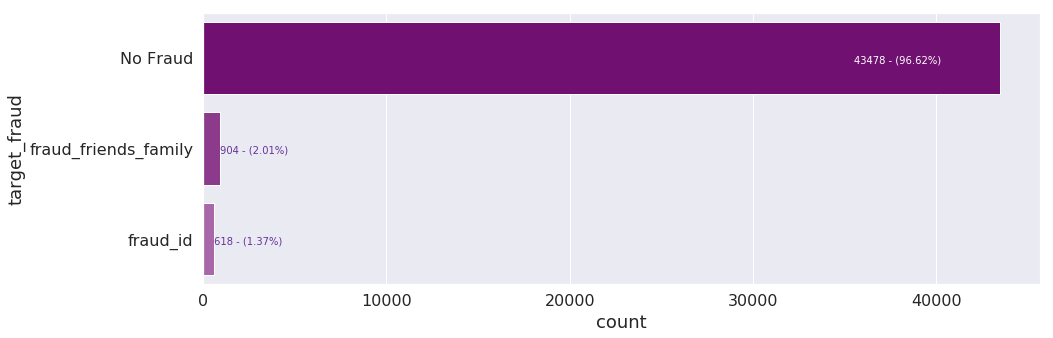

In [10]:
plot_count(acquisition, 'target_fraud', null_replace='No Fraud', x_adjust=8000)

## Acquisition data - Default Analysis

AxesSubplot(0.125,0.125;0.775x0.755)


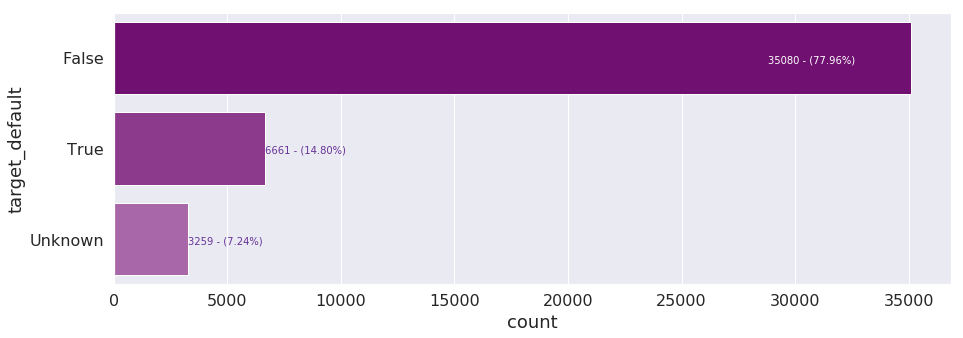

In [11]:
plot_count(acquisition, 'target_default', null_replace='Unknown', x_adjust=6300)

### Unkown data
There is a small number of observations on our dataset wich we don't know if was defaulted or not, let's exclude them

In [12]:
len(set(spend[spend['spends'] == 0]['ids']))

30703

In [13]:
df1 = spend[(spend['revolving_balance'] > 0) & (spend['revolving_balance'] > spend['spends'] * 0.9)]
len(df1)
len(set(df1['ids']))

55403

30596

In [14]:
df2 = df1.groupby('ids').filter(lambda x: len(x) > 2)
len(df2)
len(set(df2['ids']))

21826

6246

In [15]:
acquisition[acquisition['ids'] == 'foo']

,Unnamed: 0,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud,class,member_since,total_spent,total_revolving,total_minutes,total_card_requests,total_months,total_revolving_months,total_months_spent_too_much,total_revolving_min_months,max_revolving_months_in_a_row,max_revolving_min_months_in_a_row


In [16]:
import operator
acquisition[acquisition['ids'] == 'b4118fd5-77d5-4d80-3617-bacd7aaf1a88']
spend[spend['ids'] == 'b4118fd5-77d5-4d80-3617-bacd7aaf1a88']
reduce(lambda x, y: x + y, spend[spend['ids'] == 'b4118fd5-77d5-4d80-3617-bacd7aaf1a88']['spends'])
reduce(lambda x, y: x + y, spend[spend['ids'] == 'b4118fd5-77d5-4d80-3617-bacd7aaf1a88']['revolving_balance'])
reduce(lambda x, y: x + y, spend[spend['ids'] == 'b4118fd5-77d5-4d80-3617-bacd7aaf1a88']['minutes_cs'])
reduce(lambda x, y: x + y, spend[spend['ids'] == 'b4118fd5-77d5-4d80-3617-bacd7aaf1a88']['card_request'])
len(spend[spend['ids'] == 'b4118fd5-77d5-4d80-3617-bacd7aaf1a88'])  # total de meses
len(spend[(spend['ids'] == 'b4118fd5-77d5-4d80-3617-bacd7aaf1a88') & (spend['revolving_balance'] > 0)])  # total de meses que não pagou completo
len(spend[(spend['ids'] == 'b4118fd5-77d5-4d80-3617-bacd7aaf1a88') & (spend['spends'] > spend['credit_line'])])  # total de meses que gastou mais que o limite
len(spend[(spend['ids'] == 'b4118fd5-77d5-4d80-3617-bacd7aaf1a88') & (spend['revolving_balance'] > 0) & (spend['revolving_balance'] > spend['spends'] * 0.9)])  # total de meses que pagou menos que o mínimo

,Unnamed: 0,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud,class,member_since,total_spent,total_revolving,total_minutes,total_card_requests,total_months,total_revolving_months,total_months_spent_too_much,total_revolving_min_months,max_revolving_months_in_a_row,max_revolving_min_months_in_a_row
14920,14920,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,330.00,97.88,0.53,110.91,0.23,nan,nan,nan,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,46016.31,False,xsd3ZdsI3356I3xMxZeiqQ==,oyrt7nHjoQSc58vCxgJF/w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,75.00,0.00,0.00,3.00,nan,20:00:19,283,spgov.com,nan,3,0.00,59.00,elenilcio,730,"(-6.871975704157636, -51.10098548712191)",Waiting-list,205-2606869,7266.00,BR-SP,19092,"{'tags': ['n16', 'n2']}",Mozilla/5.0 (Linux; Android 6.0.1; Nexus 6P Bu...,NaN,C,16,153756.36,29254.66,63.52,2,20,13,0,0,0,0


,Unnamed: 0,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs,normalized_month,revolving_months_in_a_row,revolving_min_months_in_a_row
0,0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,0,6305.06,35.56,1,0.00,16,1,0
1,1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00,17,2,0
2,2,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,2,7167.94,0.00,0,0.00,18,0,0
3,3,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,3,16631.05,0.00,1,5.55,19,0,0
4,4,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,4,115.29,0.00,0,6.89,20,0,0
5,5,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,5,1316.74,0.00,0,0.00,21,0,0
6,6,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,6,17651.45,8903.46,0,25.62,22,1,0
7,7,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,7,403.46,0.00,0,10.32,23,0,0
8,8,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,8,2475.79,0.00,0,7.64,24,0,0
9,9,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,9,87.45,1.40,0,0.00,25,1,0


153756.35999999996

29254.66

63.52

2

20

13

0

0

In [17]:
acquisition[acquisition['target_default'].isnull()]['member_since'].value_counts()

10    149
12    143
14    142
20    139
22    138
16    135
11    135
8     134
9     133
21    132
19    130
3     130
4     129
13    129
2     129
17    128
23    128
24    127
0     127
5     125
6     122
1     121
18    119
15    118
7     117
Name: member_since, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


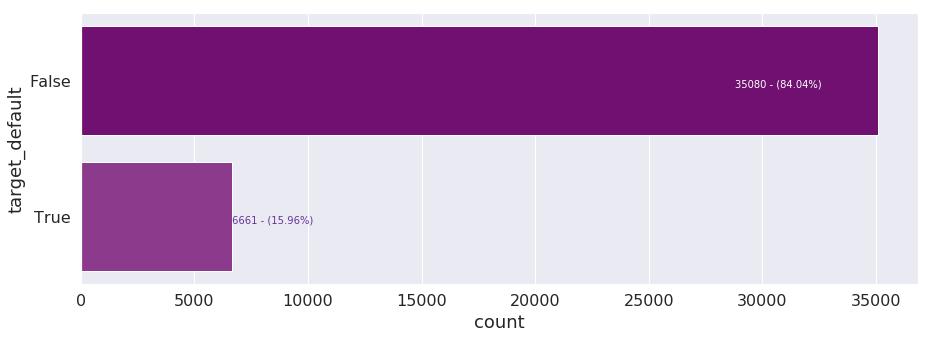

In [18]:
acquisition.dropna(subset=['target_default'], inplace=True)
plot_count(acquisition, 'target_default', null_replace='Unknown', x_adjust=6300)

## Deeper default analysis

Let's take a close look into the default data, so let's separate only default data into another dataframe.

In [19]:
default = acquisition[acquisition['target_default']]

### 1 - Default history

As we can see, most of the defaulters had not previously been defaulters, nor had they faced bankruptcy, and only a small minority had previously borrowed.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


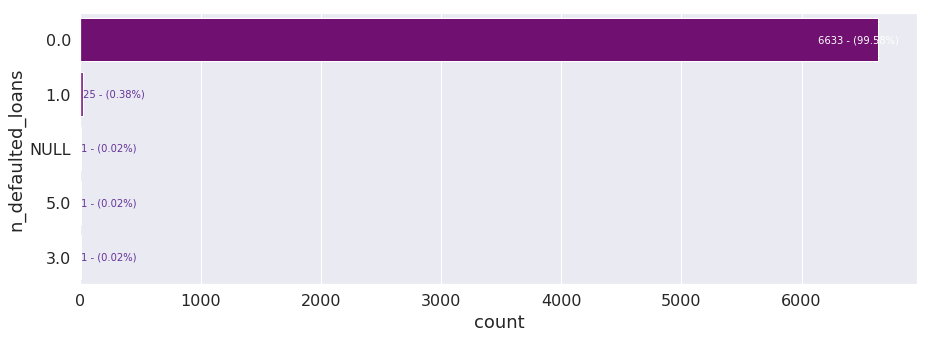

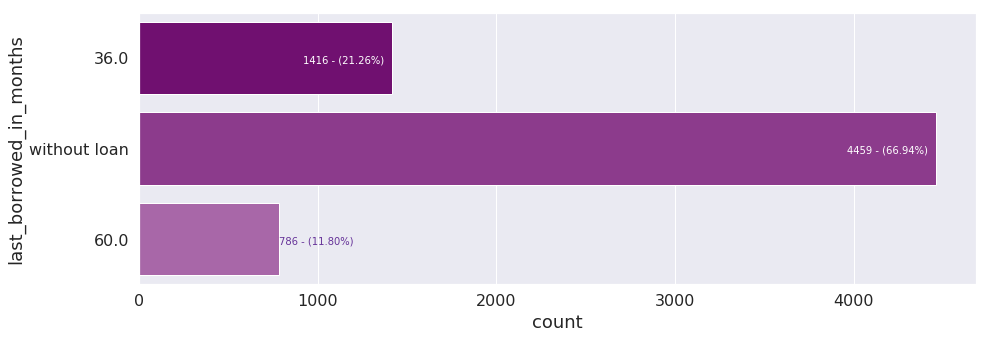

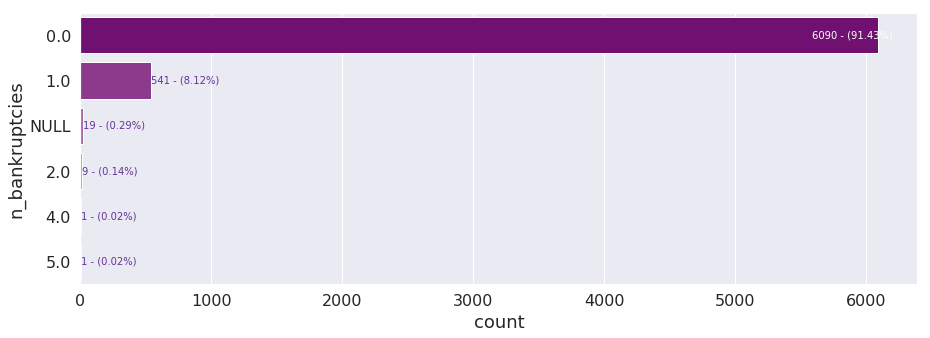

In [20]:
plot_count(default, 'n_defaulted_loans', x_adjust=500)
plot_count(default, 'last_borrowed_in_months', null_replace='without loan', x_adjust=500)
plot_count(default, 'n_bankruptcies', x_adjust=500)

### 2 - Income

Let's analyse the default against the income

In [21]:
# TRAVANDO A MÁQUINA
# 
# acquisition['class'] = ''
# acquisition.apply(classify_by_income, axis=1)
# acquisition.head()

# if os.path.isfile(new_data_path + 'acquisition_train_classified_income.csv'):
#     acquisition = pd.read_csv(new_data_path + 'acquisition_train_classified_income.csv')
# else:
#     dd.from_pandas(acquisition, npartitions=n_cores).\
#         map_partitions(lambda df: df.apply(classify_by_income, axis=1)).\
#         compute(get=get)
#     acquisition.to_csv(new_data_path + 'acquisition_train_classified_income.csv')
# acquisition.head()

AxesSubplot(0.125,0.125;0.775x0.755)


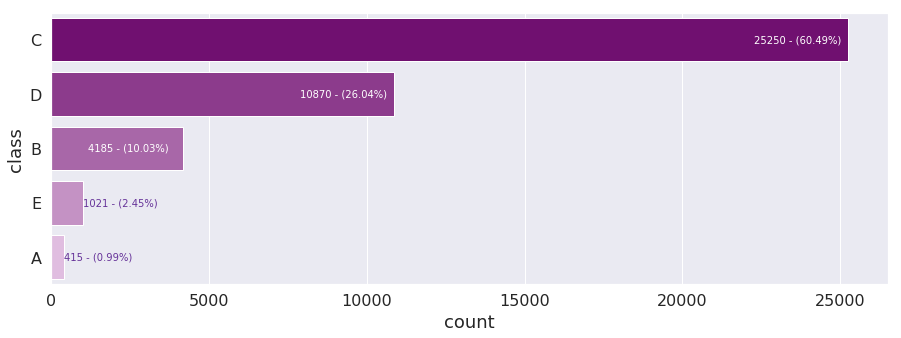

In [22]:
plot_count(acquisition, 'class', x_adjust=3000)

AxesSubplot(0.125,0.125;0.775x0.755)


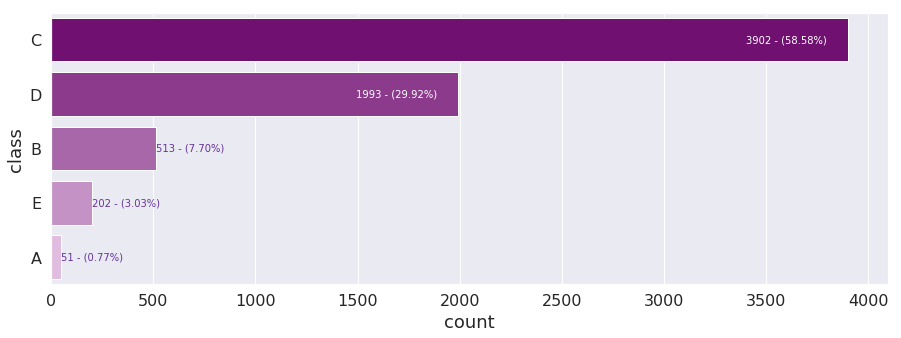

In [23]:
plot_count(default, 'class', x_adjust=500)

### 3 - Scores and Risk Analysis

As we can see, even looking at scores and risk analysis we have much similar data distribution defaulted and general application. This shows us how much this is an challenging task.

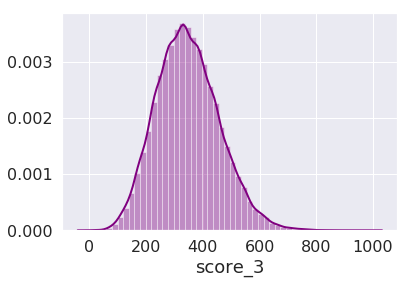

In [24]:
sns.distplot(acquisition['score_3'])

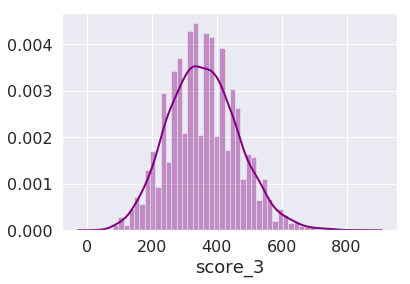

In [25]:
sns.distplot(default['score_3'])

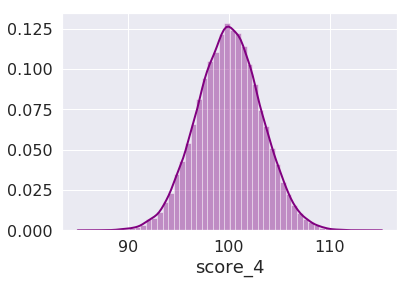

In [26]:
sns.distplot(acquisition['score_4'])

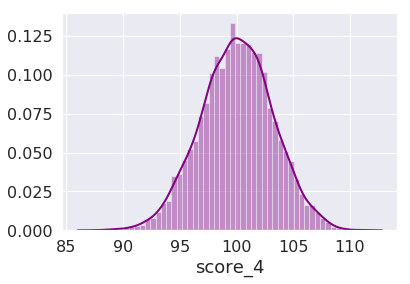

In [27]:
sns.distplot(default['score_4'])

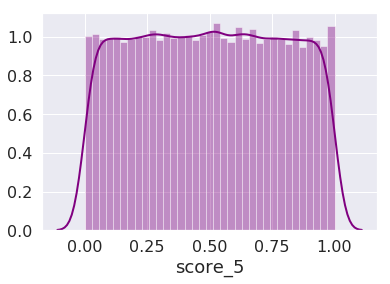

In [28]:
sns.distplot(acquisition['score_5'])

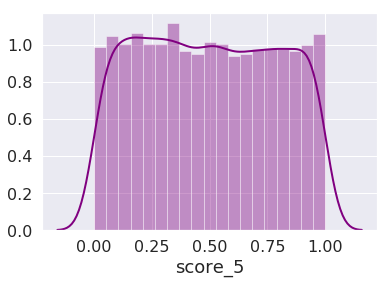

In [29]:
sns.distplot(default['score_5'])

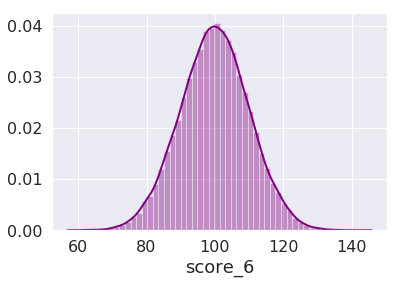

In [30]:
sns.distplot(acquisition['score_6'])

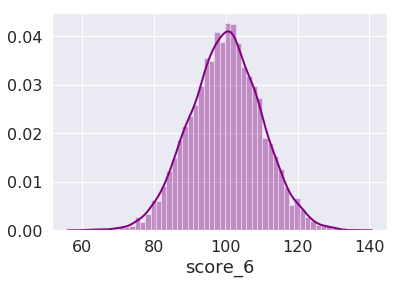

In [31]:
sns.distplot(default['score_6'])

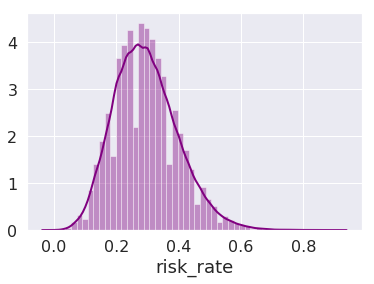

In [32]:
sns.distplot(acquisition['risk_rate'])

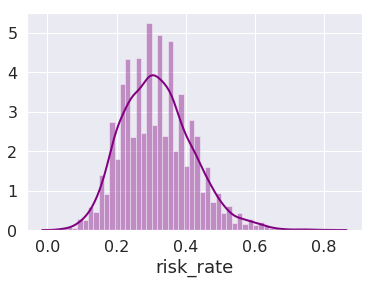

In [33]:
sns.distplot(default['risk_rate'])

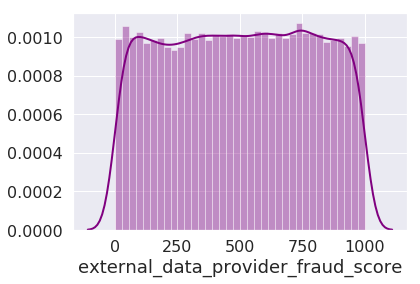

In [34]:
sns.distplot(acquisition['external_data_provider_fraud_score'])

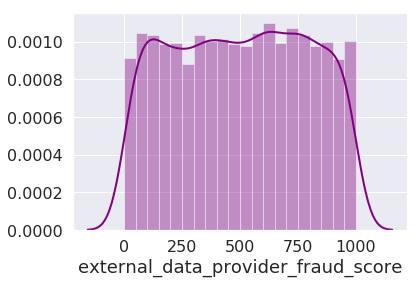

In [35]:
sns.distplot(default['external_data_provider_fraud_score'])

AxesSubplot(0.125,0.125;0.775x0.755)


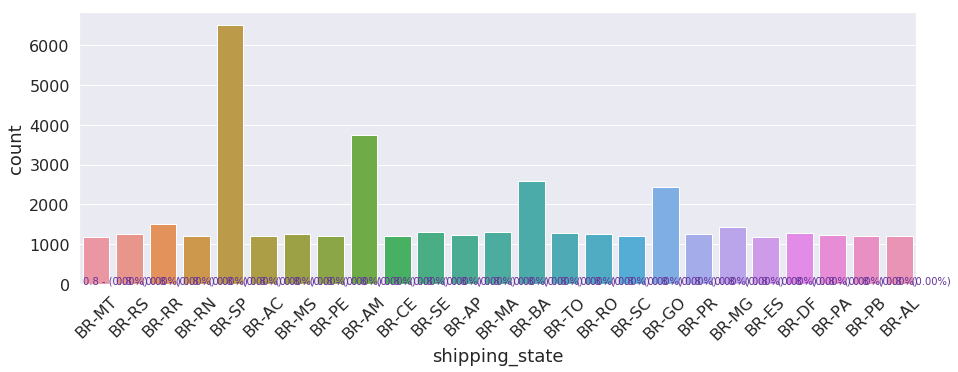

In [41]:
plot_count_v(acquisition, 'shipping_state', x_adjust=500)

AxesSubplot(0.125,0.125;0.775x0.755)


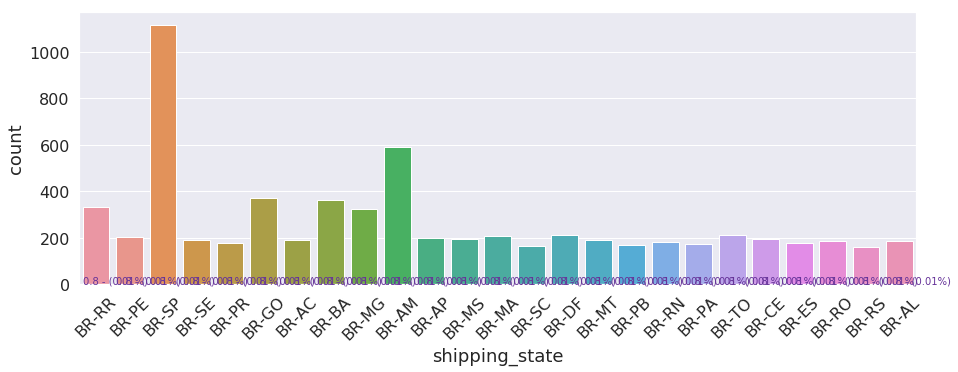

In [42]:
plot_count_v(default, 'shipping_state', x_adjust=500)

## Fraud vs Default

Let's take a look into only the subset of our data that refers to fraud. How the default is present in this piece of data?

AxesSubplot(0.125,0.125;0.775x0.755)


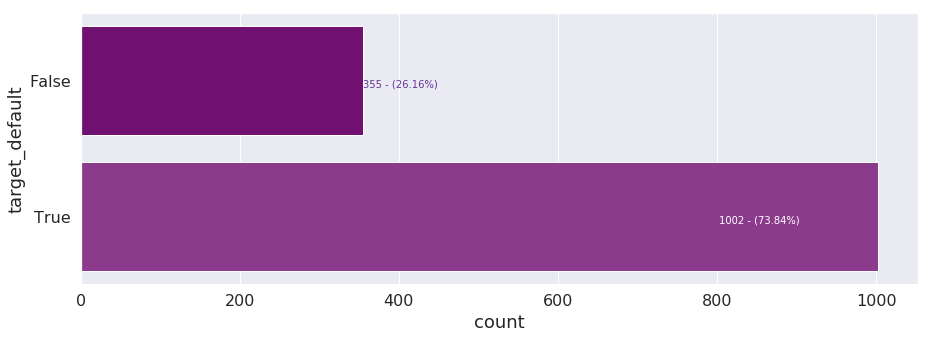

In [31]:
acquisition_fraud = acquisition.dropna(subset=['target_fraud'], inplace=False)
plot_count(acquisition_fraud, 'target_default', null_replace='Unknown', x_adjust=200)

### Default without fraud

As we can see, almost 74% of our frauds end in default. What is an expected behavior.

We need to take care of removing fraud cases from our analysis when talking about default. Makes no sense trying to predict the probability of default (PD) when dealing with a fraud case, once we already know most of the frauds are made with intention of default. 

Ideally, the fraud analysis will run before the PD analysis, so a default caused by a fraud is, first of all, a mistake in fraud analysis.

From this point on, when analyzing PD, we will always look for a view of the dataset without fraud.

AxesSubplot(0.125,0.125;0.775x0.755)


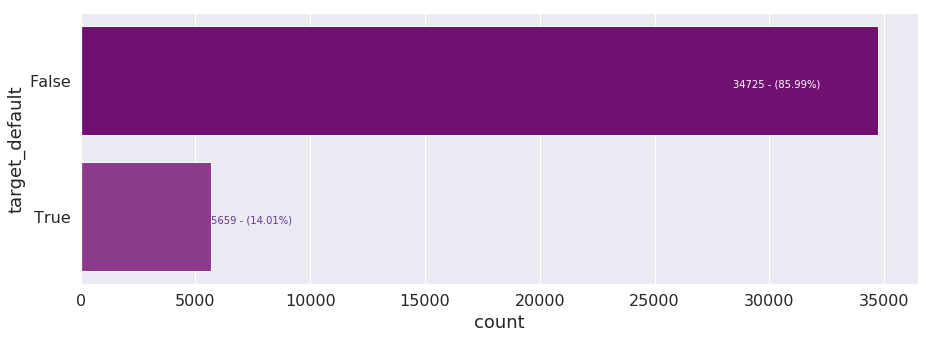

In [32]:
acquisition_without_fraud = acquisition[acquisition['target_fraud'].isnull()]
plot_count(acquisition_without_fraud, 'target_default', null_replace='Unknown', x_adjust=6300)

## Probability of Default (PD) - Naive Approach

As a naive approach, we can consider as PD the current percent of default (14.01%). Let's resume this point soon

In [33]:
acquisition_default = acquisition_without_fraud[acquisition_without_fraud['target_default'] == True]['ids'].count()
acquisition_ok = acquisition_without_fraud[acquisition_without_fraud['target_default'] == False]['ids'].count()
naive_pd = acquisition_default / (acquisition_default + acquisition_ok)

# TODO: SUBIR ISSO PARA ANTES DO PROCESSAMENTO DE ACQUISITION e renomear acquisition
## Spent Data - Normalize months

Let's take a break from the acquisition analysis and take a look into the spent data.

Each ID of the dataset starts with month 0, but has a different number of months, but the last month of each ID represents the last month of the dataset, so we set this month as the max of the dataset, and recount other months backwards.

## TODO: olhar um id que defaultou e verificar se é razoável assumir que o default aconteceu no último mês

In [34]:
# if os.path.isfile(new_data_path + 'spend_normalized_month.csv'):
#     spend = pd.read_csv(new_data_path + 'spend_normalized_month.csv')
# else:
#     normalize_months(spend)
#     spend.to_csv(new_data_path + 'spend_normalized_month.csv')
# spend.head()

### Evolution of customers in time

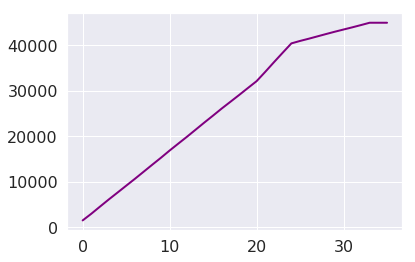

In [37]:
# TODO: colocar meses no eixo x
sns.lineplot(data=spend['normalized_month'].value_counts(), markers=True, legend='full')

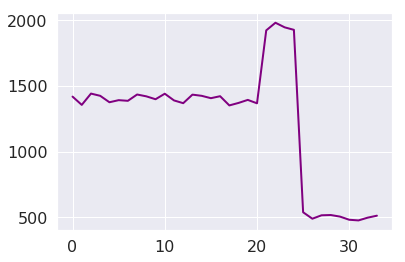

In [39]:
sns.lineplot(data=acquisition['member_since'].value_counts(), markers=True, legend='full')

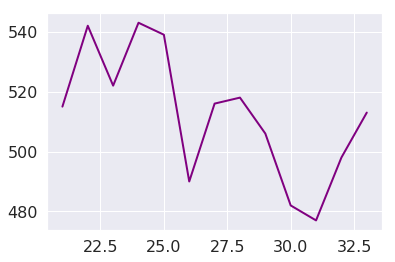

In [40]:
sns.lineplot(data=default['member_since'].value_counts(), markers=True, legend='full')

In [56]:
# sns.lineplot(data=acquisition[['member_since', 'target_default']], markers=True, legend='full')
table = pd.pivot_table(acquisition, index='member_since',values='target_default', aggfunc=np.count_nonzero)
table.head()

,target_default
member_since,
0,0
1,0
2,0
3,0
4,0


In [60]:
default['member_since'].value_counts()
acquisition['member_since'].value_counts()

24    543
22    542
25    539
23    522
28    518
27    516
21    515
33    513
29    506
32    498
26    490
30    482
31    477
Name: member_since, dtype: int64

22    1981
23    1946
24    1927
21    1923
2     1442
10    1441
7     1435
13    1434
14    1425
3     1425
16    1422
8     1421
0     1419
15    1407
9     1399
19    1394
5     1392
11    1390
6     1387
4     1376
18    1371
12    1369
20    1368
1     1356
17    1352
25     539
28     518
27     516
33     513
29     506
32     498
26     490
30     482
31     477
Name: member_since, dtype: int64

In [ ]:
# DEMORANDO MUITO PRA RODAR - VALIDAR A REAL NECESSIDADE
# %%capture
# # TODO: aqui tem o problema dos apagados, mas subindo esse problema não vai acontecer
# # e dá pra fazer uma análise dos default unknown com member since
# acquisition['member_since'] = 0
# ids_set = set(spend['ids'])
# print('start')
# count = 0
# for current_id in ids_set:
#     count += 1
#     ids_subset = spend[spend['ids'] == current_id]
#     min_current_id_month = min(ids_subset['normalized_month'])
#     idx = acquisition[acquisition['ids'] == current_id].index
#     acquisition.set_value(idx, 
#                           'member_since', 
#                           min_current_id_month)

## Merging datasets

Let's create a new merged dataset with some calculated columns as well

## Separate a dataset with only default

We need to understand better the default cases, so, we need to separate this cases and take a closer look into this

In [ ]:
# We need to force comparing == True because of the null values in column
default_df = train_df[train_df['target_default'] == True]
default_df.shape

### Basic inspecting into default dataset

In [ ]:
default_df.info()
default_df.describe()

default_df.head()
default_df.tail()

### Closer look into some columns

#### Single value columns

The columns `channel` and `external_data_provider_credit_checks_last_2_year` have only unique values in each of them.

They should be removed.

In [ ]:
default_df['channel'].value_counts()
default_df['external_data_provider_credit_checks_last_2_year'].value_counts()

default_df.drop(['channel','external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)

#### Sparse columns (less than 10%)
- job_name
- reason
- zip - com muitos valores podem ser códigos de regiões grandes, pode ser substituído pelo estado?
- job_name
- shipping_zip_code

#### Colunas que não batem
- state

#### Comparar com não default
- real_state
- n_bankruptcies
- n_defaulted_loans

#### Abrir o dicionário
- profile_tags

#### Agrupar por sistema
- user_agent

In [ ]:
default_df['score_1'].value_counts()
default_df['score_2'].value_counts()
default_df['reason'].value_counts()
default_df['state'].value_counts()
default_df['zip'].value_counts()
default_df['job_name'].value_counts()
default_df['real_state'].value_counts()
default_df['marketing_channel'].value_counts()
default_df['shipping_state'].value_counts()
default_df['shipping_zip_code'].value_counts()
default_df['profile_tags'].value_counts()
default_df['user_agent'].value_counts()
default_df['last_borrowed_in_months'].value_counts()
default_df['ok_since'].value_counts()
default_df['n_bankruptcies'].value_counts()
default_df['n_defaulted_loans'].value_counts()

In [ ]:
# verificando se prefixos correlacionam com estados
phone_prefix = test_df['profile_phone_number'].map(lambda x: x[:2])
phone_prefix.name = 'prefix_phone_number'
test_df = pd.concat([test_df, phone_prefix], axis=1)
test_df.head()

### Removing unvaluable columns

The columns listed below do not aggregate information for our analysis:
- channel - there is only one value, namely NCqL3QBx0pscDnx3ixKwXg==
- external_data_provider_first_name
- profile_phone_number
- profile_tags
- user_agent

#### Drop missing in target

Missing values in our target variable represents 7,24%. Let's drop.

In [ ]:
train_df.dropna(subset=['target'], inplace=True)
train_df.shape
train_df.info()

### Remove unknown columns

We need to remove all unknown columns at acquisition time

TODO: Verificar as colunas:
- risk_rate

In [ ]:
unknown = ['credit_limit']
for col in unknown:
    train_df.drop(col, axis=1, inplace=True)
    test_df.drop(col, axis=1, inplace=True)

### Check consistency values

Valores negativos por exemplo

### Remove ids

TODO: verificar essa parte de separar a variável

Now we have to separate the column `ids` to create submission file at end and drop this column

In [ ]:
train_df.drop('ids', axis=1, inplace=True)
test_df.drop('ids', axis=1, inplace=True)

### Other Missing values

As we can see, there is missing values in our target column

In [ ]:
missing_value_columns = train_df.columns[train_df.isnull().any()].tolist()
train_df_missing = train_df[missing_value_columns]

msno.bar(train_df_missing,figsize=(20,8),color=default_color,fontsize=18,labels=True)
msno.matrix(train_df_missing,figsize=(20,8),fontsize=14)
msno.heatmap(train_df_missing,figsize=(20,8),cmap=colormap)

## Fraud analysis

Faça uma análise dos casos de fraude. Qual a relação deles com os casos de inadimplência?

## Behavior analysis

Analisando a distribuição do volume de compras em 3 meses dos clientes (variável pv_3m), você diria que ela segue uma distribuição normal? Há algo de estranho nela? Se sim, qual seria a justificativa ou hipótese para tal?